#### 【 이미지 처리 - 이진화와 임계값 】

- 이미지를 특정 기준 값으로 픽셀값을 나누는 것
- 0과 1(255)로 나눈 경우 이진화라고 함!
- 픽셀 기준값은 이미지마다 다름. 이미지의 영역마다 다름!!

[1] 모듈 로딩 및 사용자 함수 정의 <hr>

In [1]:
## [1-1] 모듈로딩
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
## 설정
DATA_FILE = '../Data/Image/gray_gradient.jpg'

img_gray = cv2.imread(DATA_FILE, cv2.IMREAD_GRAYSCALE)

print(f'img_gray => {img_gray.shape}')

img_gray => (200, 300)


[2] 이미지 이진화 & 다양한 Threshold

In [ ]:
## 이미지 전체 픽셀의 평균값
print(f'img_gray 픽셀 평균값 => {img_gray.mean()}')

img_gray 픽셀 평균값 => 127.08


In [11]:
## 다양한 임계값 설정에 따른 이진화
THRESHOLD = round(img_gray.mean())

##-> THRESH_BINARY 옵션
retv, outimg1 = cv2.threshold(img_gray, THRESHOLD, 255, cv2.THRESH_BINARY)
print(f'retv => {retv}, outimg => {outimg1.shape}')

##-> THRESH_BINARY 옵션
retv, outimg2 = cv2.threshold(img_gray, THRESHOLD, 255, cv2.THRESH_BINARY_INV)
print(f'retv => {retv}, outimg => {outimg2.shape}')

print(cv2.THRESH_BINARY, cv2.THRESH_BINARY_INV)
print(cv2.THRESH_TRUNC, cv2.THRESH_TOZERO, cv2.THRESH_TOZERO_INV)

retv => 127.0, outimg => (200, 300)
retv => 127.0, outimg => (200, 300)
0 1
2 3 4


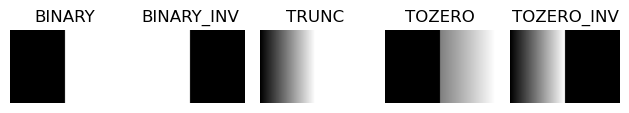

In [12]:
## 다양한 임계값 설정에 따른 이진화
THRESHOLD = round(img_gray.mean())

##-> THRESH 옵션에 따른 결과 저장 및 시각화
outImages=[]
for ntype in range(cv2.THRESH_BINARY+5):
    _, outimg = cv2.threshold(img_gray, THRESHOLD, 255, ntype)
    outImages.append(outimg)

##-> 시각화
fig, axes = plt.subplots(1, 5)
titles    = ['BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']

for ax, img, title in zip(axes, outImages, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.set_axis_off()

plt.tight_layout()
plt.show()

[3] 이미지 최적의 임계값(Threshold) 찾기 <hr>

In [18]:
## 스캔 이미지
DATA_FILE = '../Data/Image/scaned_paper.jpg'

## 이미지 로딩
scanImg = cv2.imread(DATA_FILE, cv2.IMREAD_GRAYSCALE)

print(f'scanImg => {scanImg.shape}, pixel mean => {scanImg.mean()}')

scanImg => (450, 400), pixel mean => 152.77648333333335


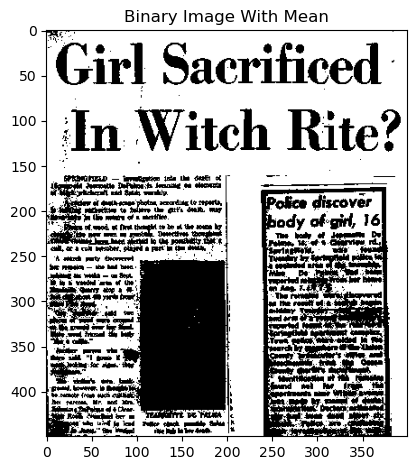

In [20]:
## 이진화 이미지 추출 => 최적의 임계값
THRESHOLD = round(scanImg.mean())

_, outimg = cv2.threshold(scanImg, THRESHOLD, 255, cv2.THRESH_BINARY)

plt.imshow(outimg, cmap='gray')
plt.title("Binary Image With Mean")
plt.tight_layout()
plt.show()

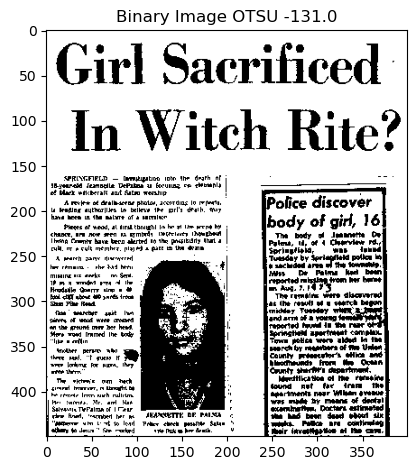

In [ ]:
## -----------------------------------------------------------
## 오츠의 알고리즘 활용한 최적의 임계값 찾기
## -----------------------------------------------------------
THRESHOLD = round(scanImg.mean())

fit_thresh, outimg = cv2.threshold(scanImg,
                                   THRESHOLD,
                                   255,
                                   cv2.THRESH_BINARY|cv2.THRESH_OTSU)

plt.imshow(outimg, cmap='gray')
plt.title(f"Binary Image OTSU -{fit_thresh}")
plt.tight_layout()
plt.show()

[4] 이미지 영역별 최적의 임계값(Threshold) 찾기<hr>

In [27]:
## 스캔 이미지
DATA_FILE = '../Data/Image/sudoku.png'

## 이미지 로딩
img = cv2.imread(DATA_FILE, cv2.IMREAD_GRAYSCALE)

print(f'img => {img.shape}, pixel mean => {img.mean()}')

img => (563, 558), pixel mean => 101.7884190556224


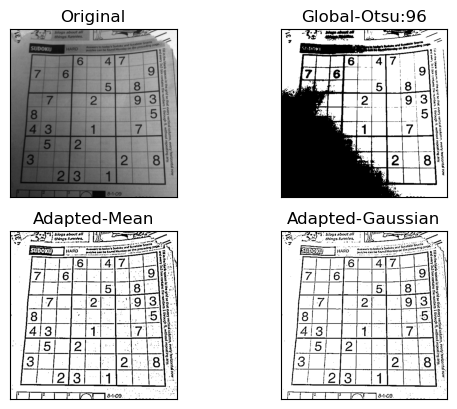

In [28]:
blk_size = 9
C = 5

ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
                                      cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                      cv2.THRESH_BINARY, blk_size, C)

imgs = {'Original': img, 'Global-Otsu:%d'%ret:th1, \
        'Adapted-Mean':th2, 'Adapted-Gaussian':th3}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v, 'gray')
    plt.xticks([]), plt.yticks([])